In [69]:
%matplotlib inline
import pandas_profiling as pdp
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv

import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
#matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
#plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない



In [70]:
df_train = pd.read_csv(os.path.join(os.getcwd(),'train_set.csv'), delim_whitespace=False)
df_test = pd.read_csv(os.path.join(os.getcwd(),'test_set.csv'), delim_whitespace=False)

df_all = pd.concat([df_train,df_test])# df_all = df_train + df_test 

quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('PRICE')
quantitative.remove('Id')

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_all.select_dtypes(include=[float]).isnull().sum()

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


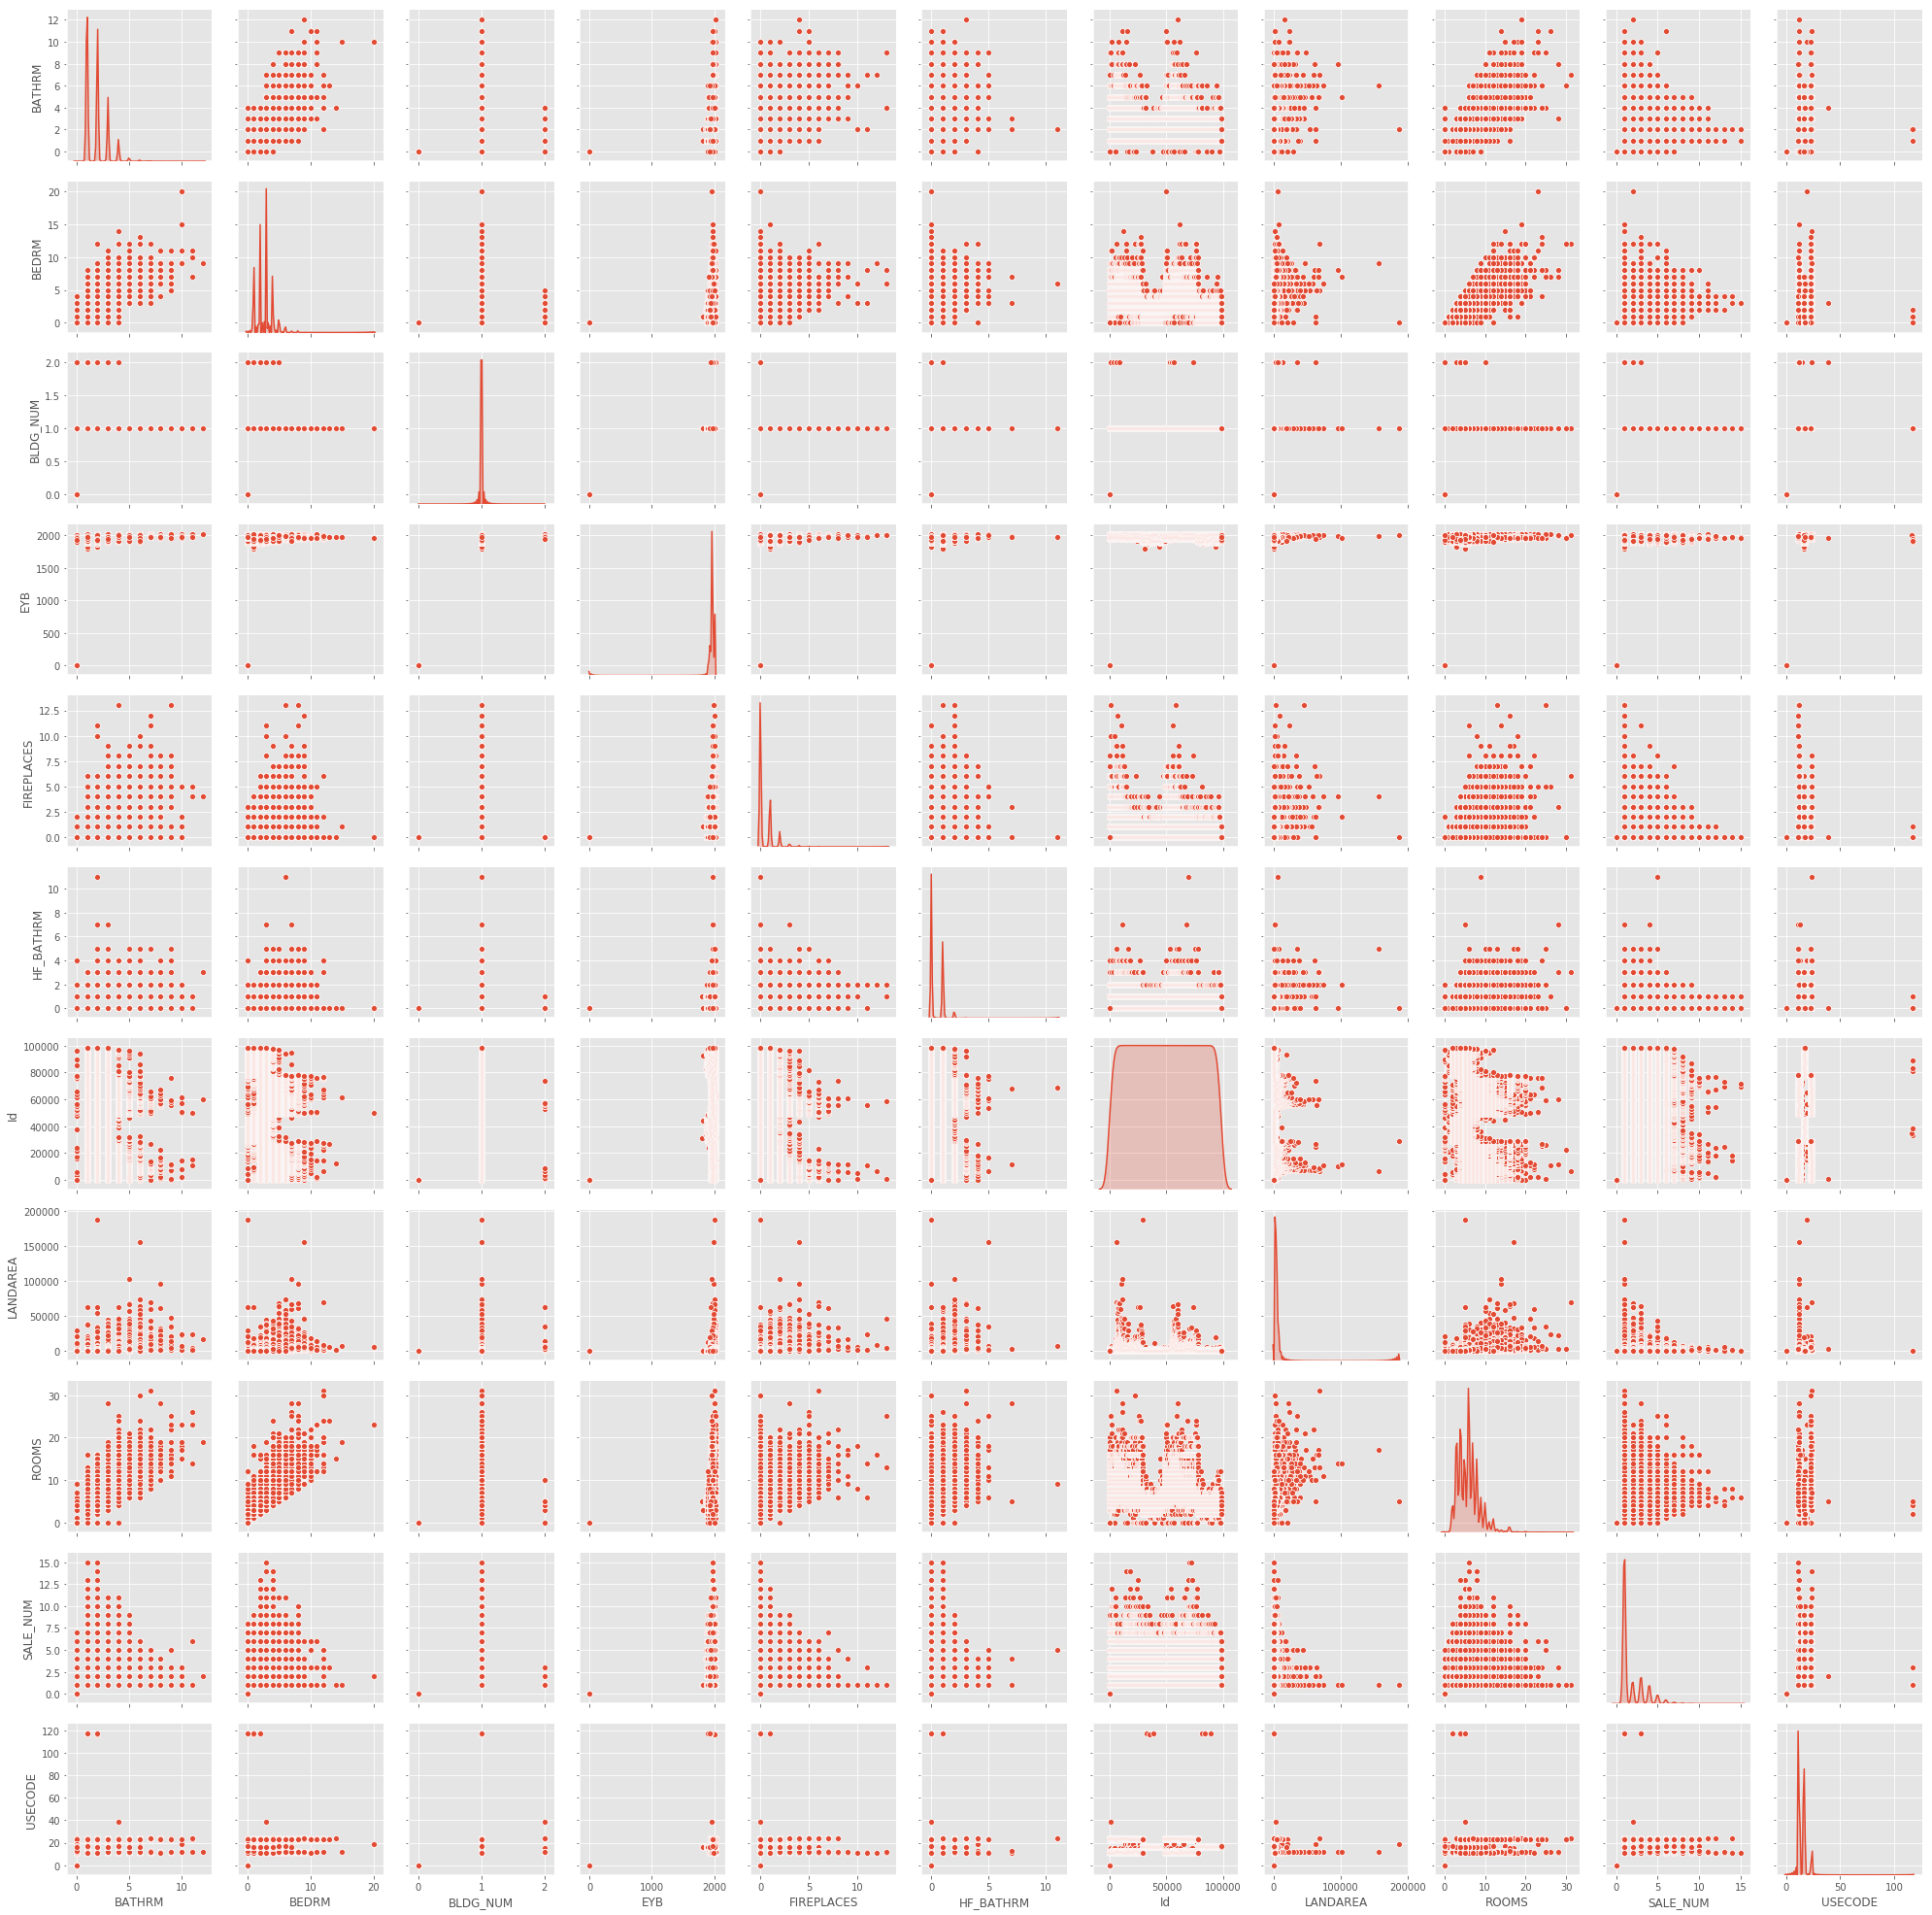

In [73]:
sns.pairplot(df_all.select_dtypes(include=[int]),diag_kind='kde')

In [ ]:
sns.pairplot(df_all.select_dtypes(include=[float]),diag_kind='kde')

In [72]:
#外れ値を中央値で埋めています 
df_all[df_all["FIREPLACES"] > 100] = 0

In [ ]:
plt.scatter(df_all.Id,df_all.PRICE)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


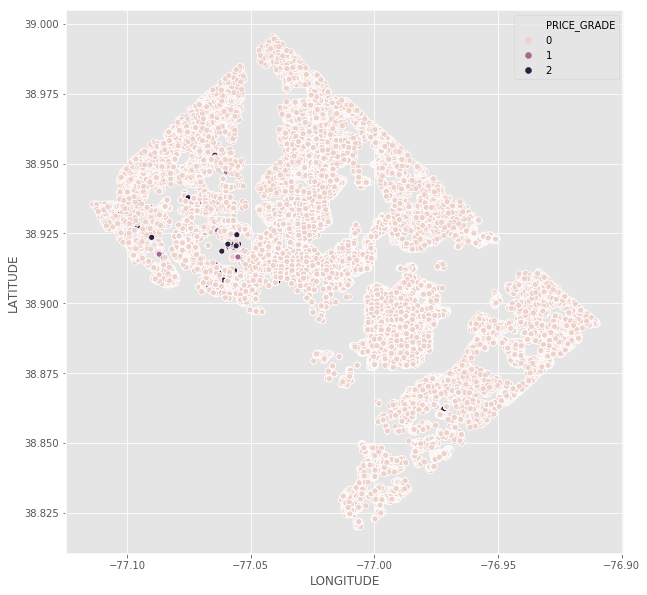

In [75]:
#価格帯ごとに分ける
def func_cate(x):
    if  x < 4000000:
        return 0
    elif x >= 4000000 and x < 6000000:
        return 1
    else:
        return 2


df_train['PRICE_GRADE'] = df_train['PRICE'].apply(func_cate)

#緯度経度のマップに価格をプロット
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=df_train,hue="PRICE_GRADE")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


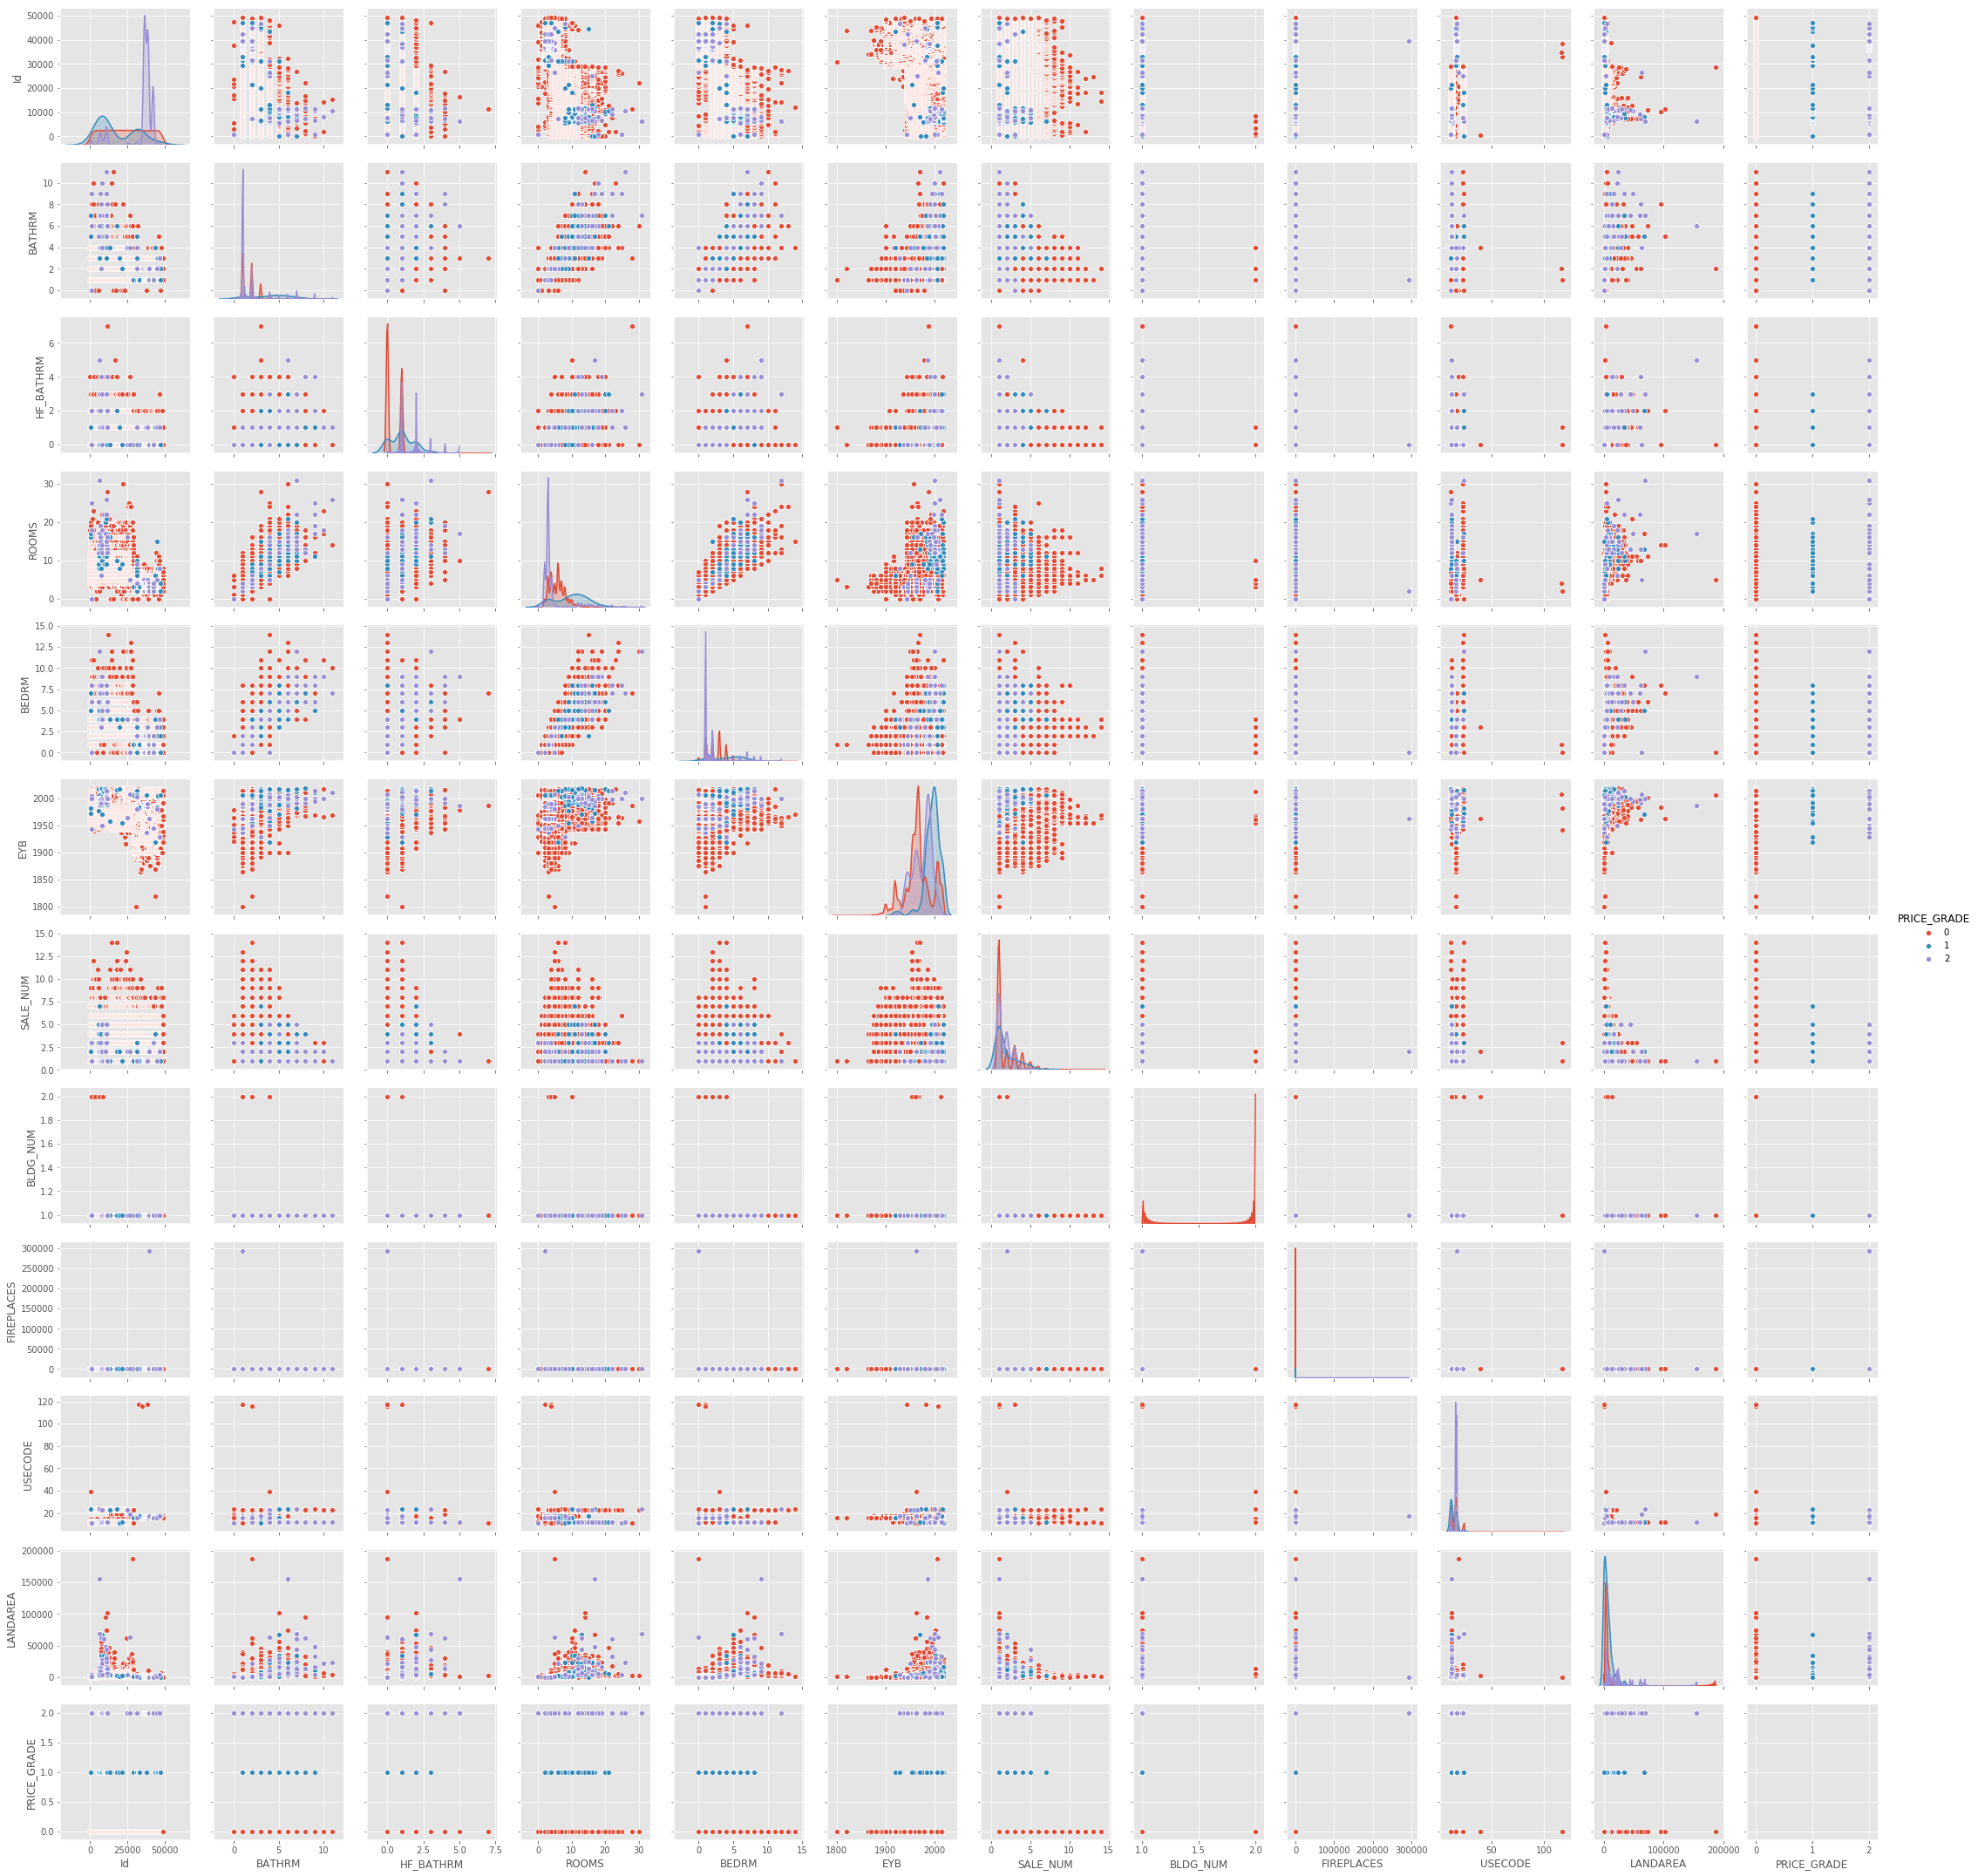

In [76]:

sns.pairplot(df_train.select_dtypes(include=[int]),diag_kind='kde',hue="PRICE_GRADE")

KeyError: 'PRICE_GRADE'

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


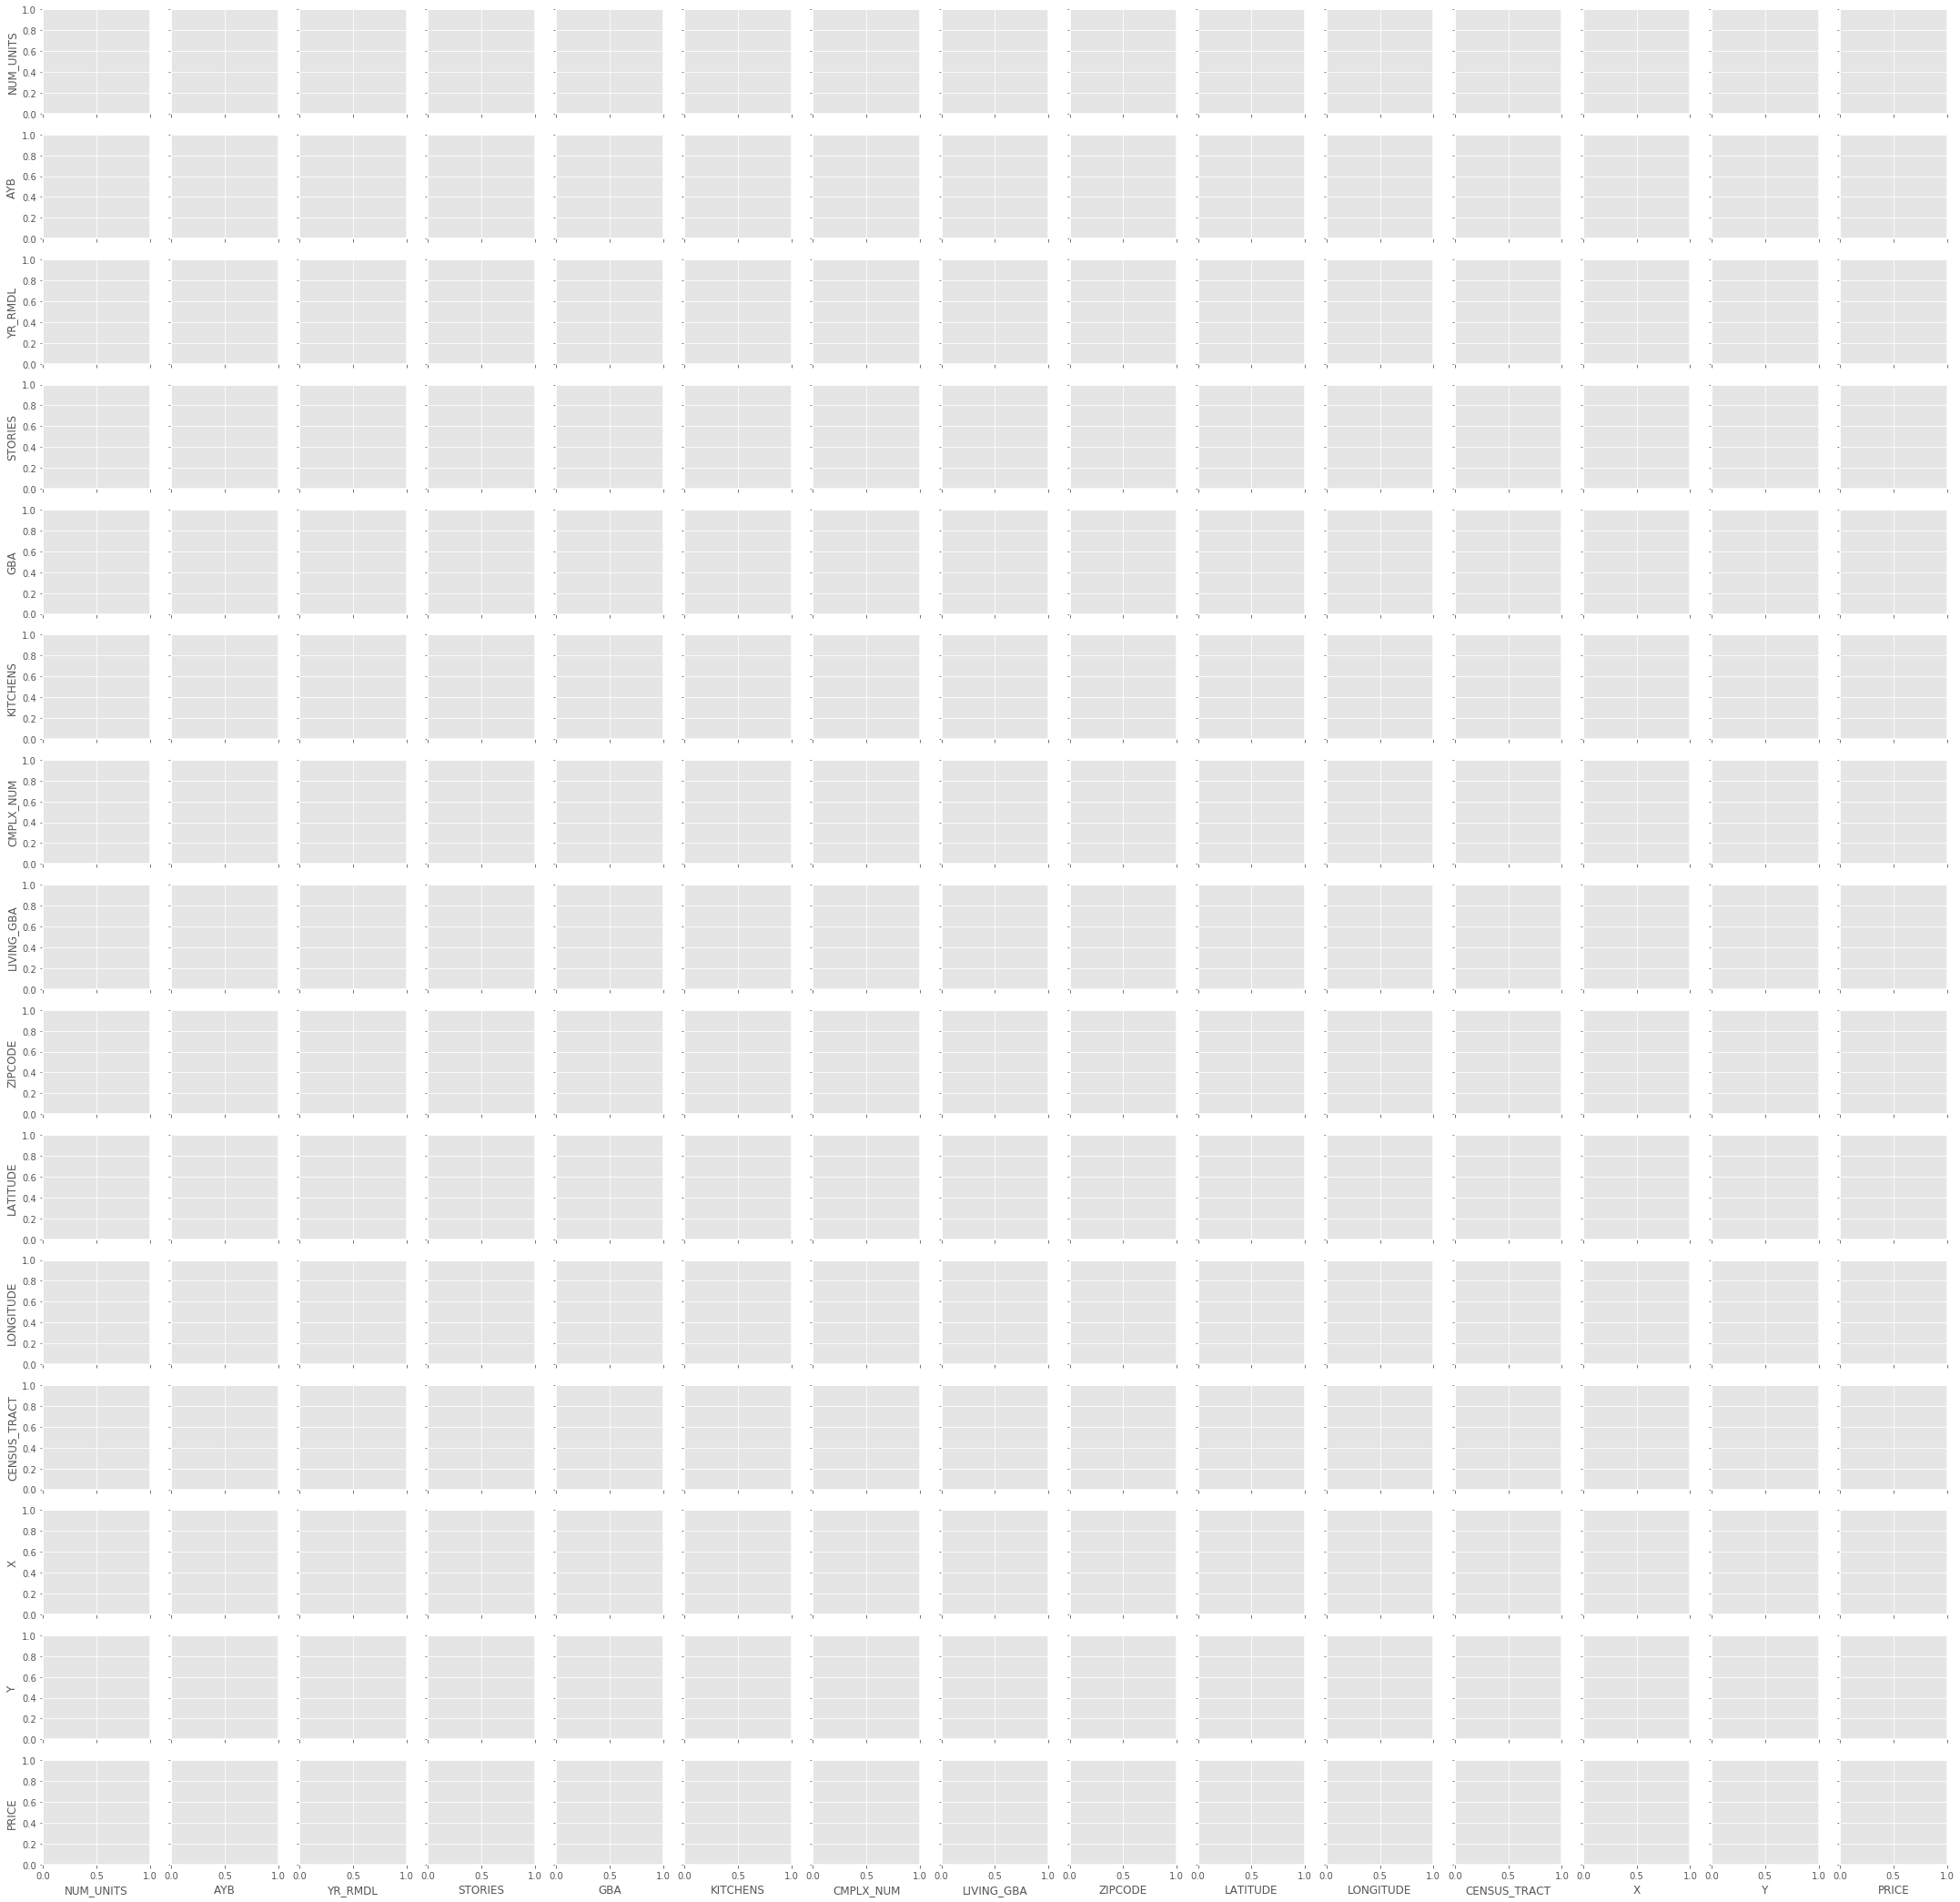

In [77]:
df_train["PRICE_GRADE"].astype(float)
sns.pairplot(df_train.select_dtypes(include=[float]),diag_kind='kde',hue="PRICE_GRADE")